In [90]:
from DataAnalysis import *
from Plotting import *

# Global Figures

In [91]:
filtered_days=[]#'2018-06-07', '2018-06-06']
aggregator =""
label_table = "clicks"
ratioLabel = "Ratio"
volume_label = "Count"

# Main aggregations

## Retailers (cbs_media_source_id)

In [113]:
def read_and_clean2(filename, dimensions, label, additional_columns = True):
    df = pd.read_csv(filename, sep='\t', header=None)
    names=dimensions
    names.extend(['Count', label])
    df.columns = names
    df = df.fillna("Other")

    # order
    df = df.sort_values(by=dimensions)

    if additional_columns :
        return compute_additional_columns(df, label)
    else :
        return df

In [154]:
def round_column(df, dimension, factor):
    return df[[dimension]].apply(lambda x : round(factor* x.values[0])/factor)

In [139]:
dimension = "cbs_product_rating"#"cbs_product_rating"
label_table = "clicks"

min_percentage_volume = 1
max_sum_percentage_volume = 90

filename ="files/clicks_cbs_product_rating_2weeks.txt" #get_filename(label_table, dimension)
df_clicks = read_and_clean_v2(filename, ["Day",dimension], label_table, additional_columns=False)



In [144]:
df_clicks["cbs_product_rating_rounded"] = round_column(df_clicks, "cbs_product_rating", 10)
df_clicks_rounded = df_clicks.groupby("cbs_product_rating_rounded", as_index = False).sum()
df_clicks_rounded = compute_ratio(df_clicks_rounded, "clicks")

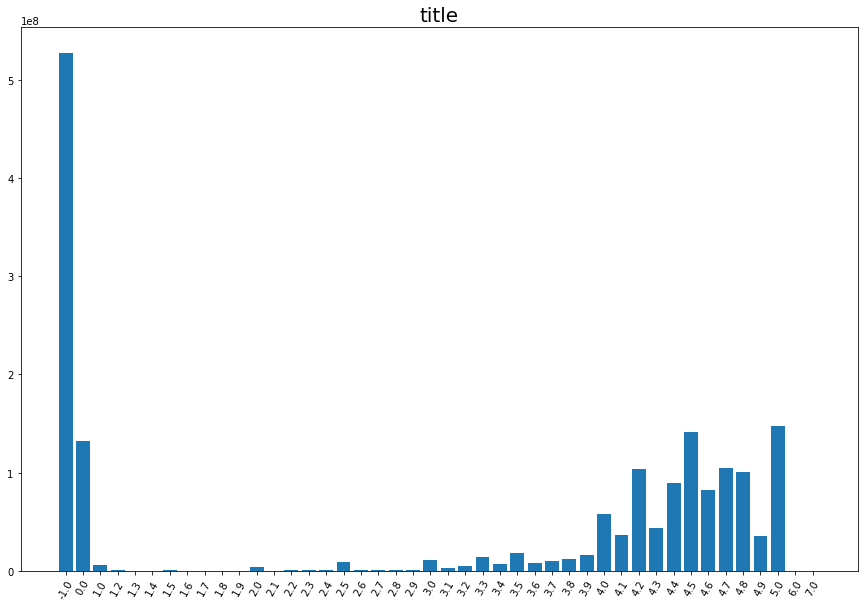

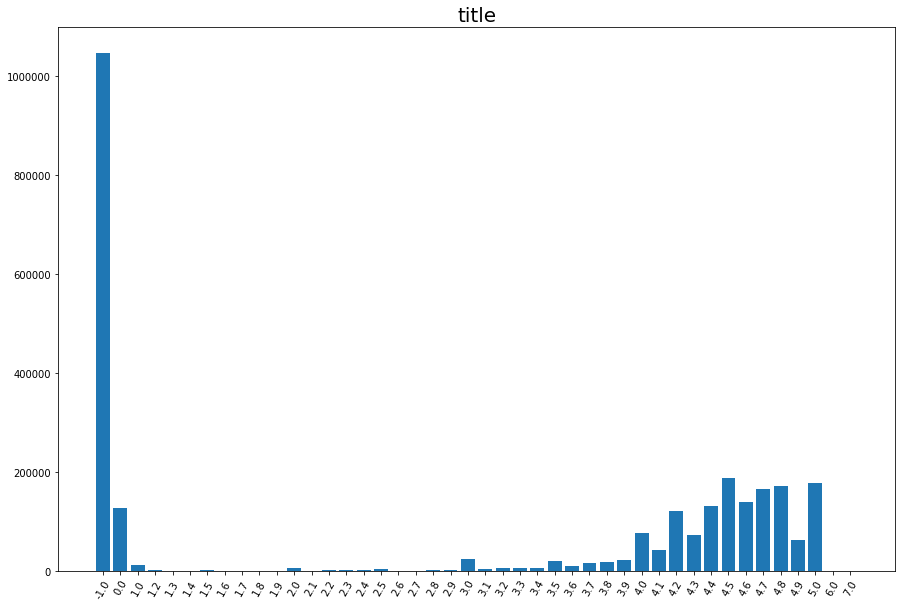

In [147]:
plot_bar(df_clicks_rounded["cbs_product_rating_rounded"], df_clicks_rounded["Count"], "title")
plot_bar(df_clicks_rounded["cbs_product_rating_rounded"], df_clicks_rounded["clicks"], "title")

In [ ]:
print(df_clicks[df_clicks["cbs_product_rating_rounded"] == 6])

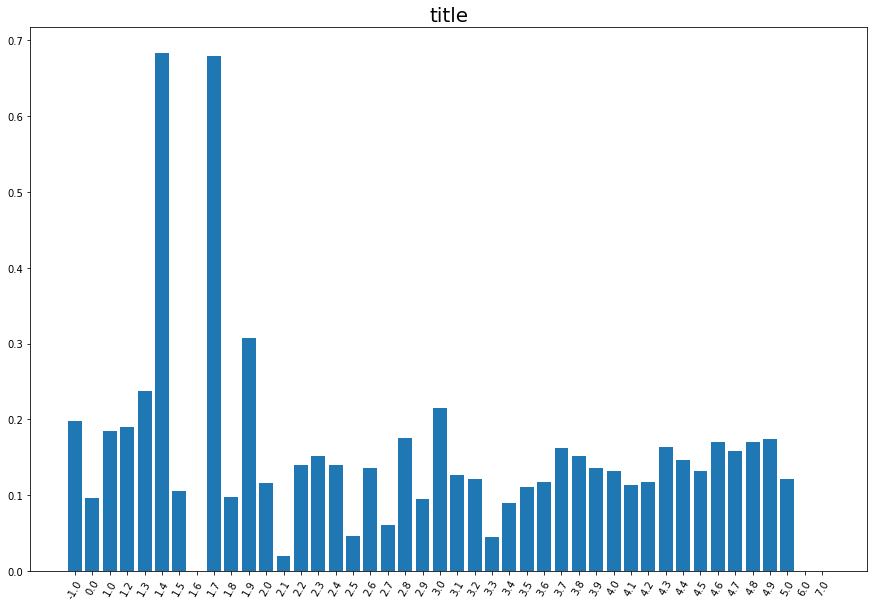

In [148]:
plot_bar(df_clicks_rounded["cbs_product_rating_rounded"], df_clicks_rounded["Ratio"], "title")

In [54]:
df_clicks[df_clicks["cbs_product_rating"]==-1]

,cbs_product_rating,Count,clicks,cbs_product_rating_rounded
2628,-1.0,31531256,75195,-1.0


In [149]:
all_values = df_clicks[dimension].unique()
cardinality = len(all_values)
max_value = max(all_values)
min_value = min(all_values)

print("total nb rows = " + str(len(df_clicks)))
print("cardinality = "+ str(cardinality))
print("min value = "+ str(min_value))
print("max value = "+ str(max_value))

total nb rows = 59780
cardinality = 8267
min value = -1.0
max value = 7.0


In [ ]:
def display_rows_by_aggretor(df,aggregator,label_table,volume_label, values=[]):
    i = 0
    rows = [["", "Mean", 'Std', "Std/Mean percent"]]

    values = df[aggregator].unique() if len(values)== 0 else values
    for value in values:
        df_aggregator = df[df[aggregator] == value]
        df_aggregator_by_day = group_by_label_sum(df_aggregator, ["Day"])
        df_aggregator_by_day = compute_ratio(df_aggregator_by_day, label_table)

        df_aggregator_by_hour = group_by_label_average(df_aggregator, ["Hour"])
        df_aggregator_by_hour = compute_ratio(df_aggregator_by_hour, label_table)
        update_rows(rows, [(df_aggregator_by_day, "day"), (df_aggregator_by_hour, "hour")], [volume_label], str(value))

    display(rows)

day = 2018-06-06 cardinality = 3980 min value = -1.0 max value = 5.0
day = 2018-06-07 cardinality = 3938 min value = -1.0 max value = 5.0


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


day = 2018-06-08 cardinality = 4277 min value = -1.0 max value = 5.0
day = 2018-06-09 cardinality = 4354 min value = -1.0 max value = 5.0
day = 2018-06-10 cardinality = 4413 min value = -1.0 max value = 5.0
day = 2018-06-11 cardinality = 4393 min value = -1.0 max value = 5.0
day = 2018-06-12 cardinality = 4422 min value = -1.0 max value = 5.0
day = 2018-06-13 cardinality = 4287 min value = -1.0 max value = 5.0
day = 2018-06-14 cardinality = 4366 min value = -1.0 max value = 5.0
day = 2018-06-15 cardinality = 4337 min value = -1.0 max value = 7.0
day = 2018-06-16 cardinality = 4298 min value = -1.0 max value = 5.0
day = 2018-06-17 cardinality = 4046 min value = -1.0 max value = 5.0
day = 2018-06-18 cardinality = 4498 min value = -1.0 max value = 5.0
day = 2018-06-19 cardinality = 4171 min value = -1.0 max value = 6.0


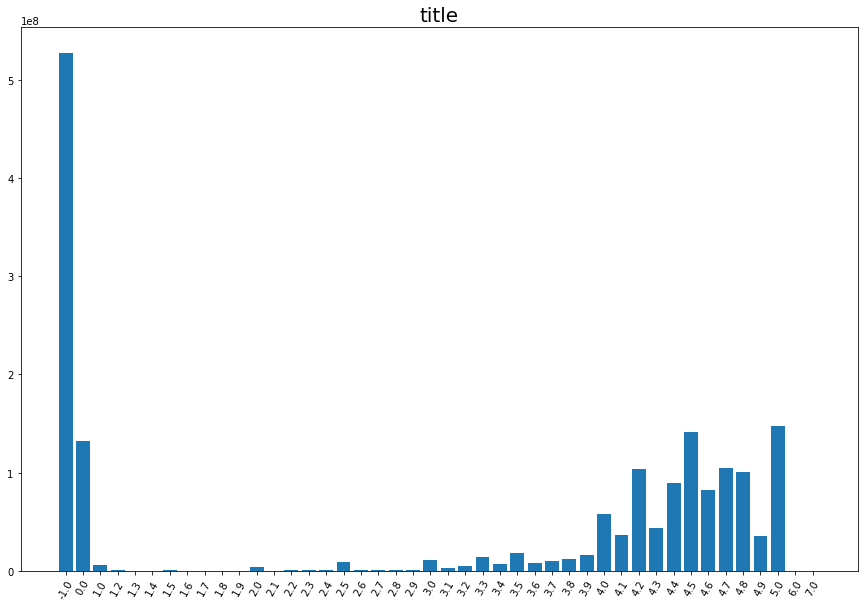

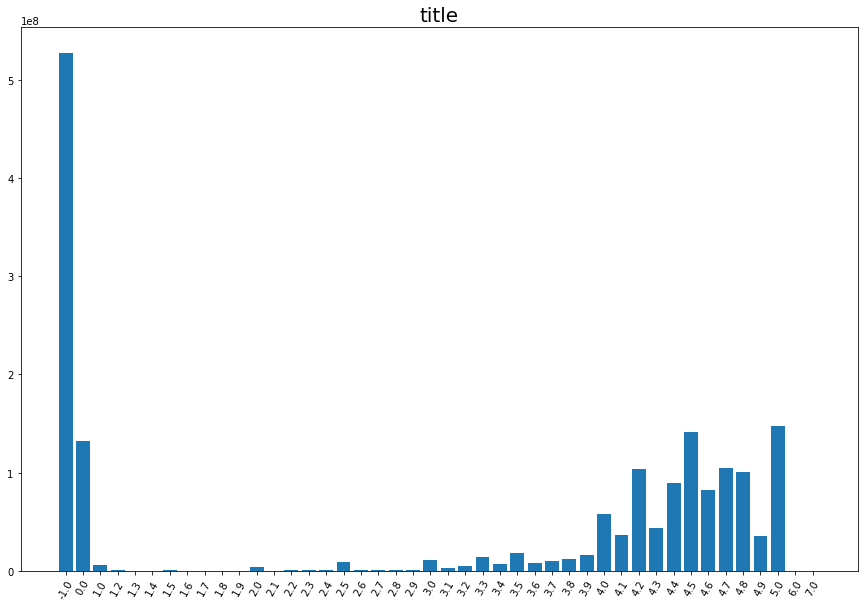

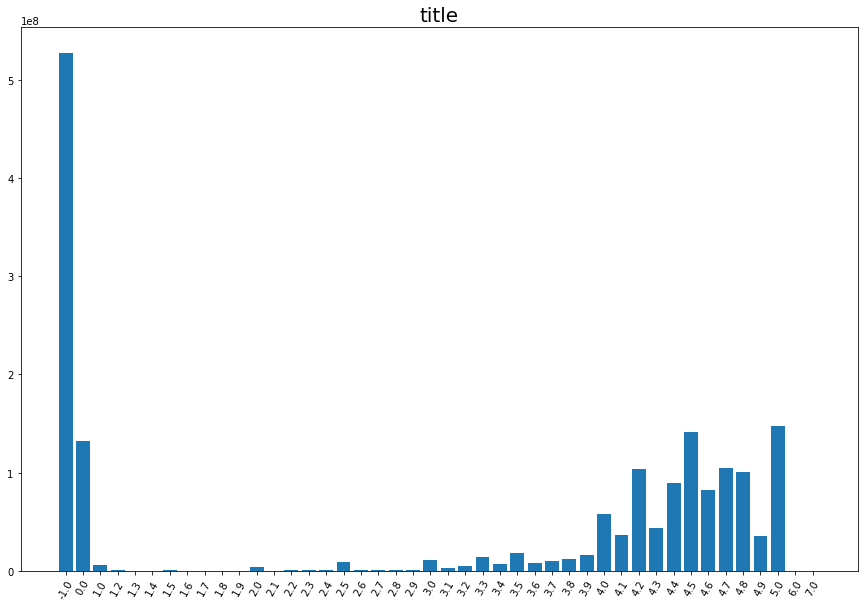

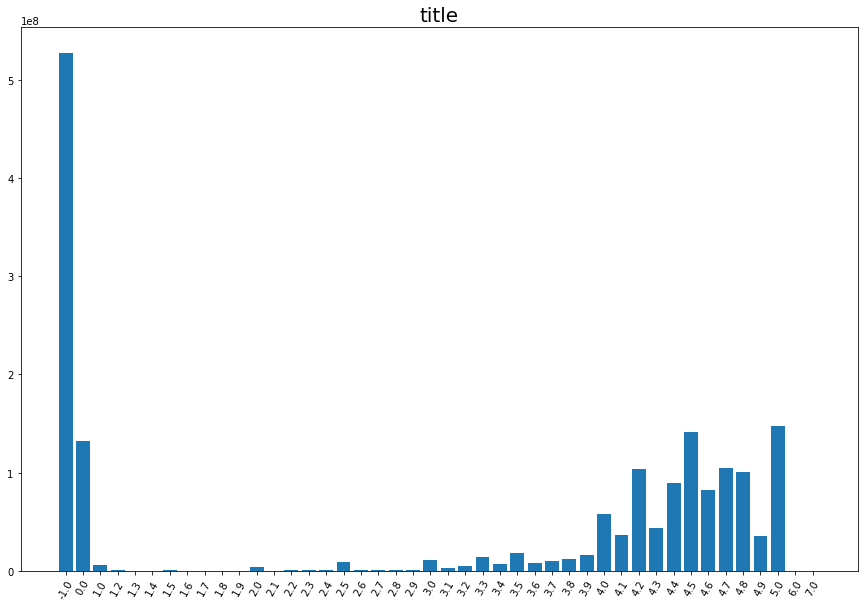

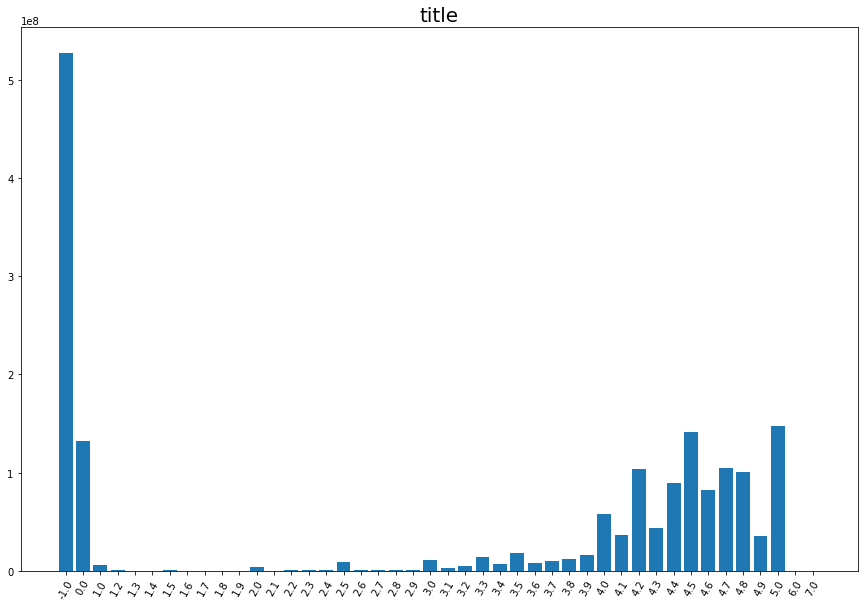

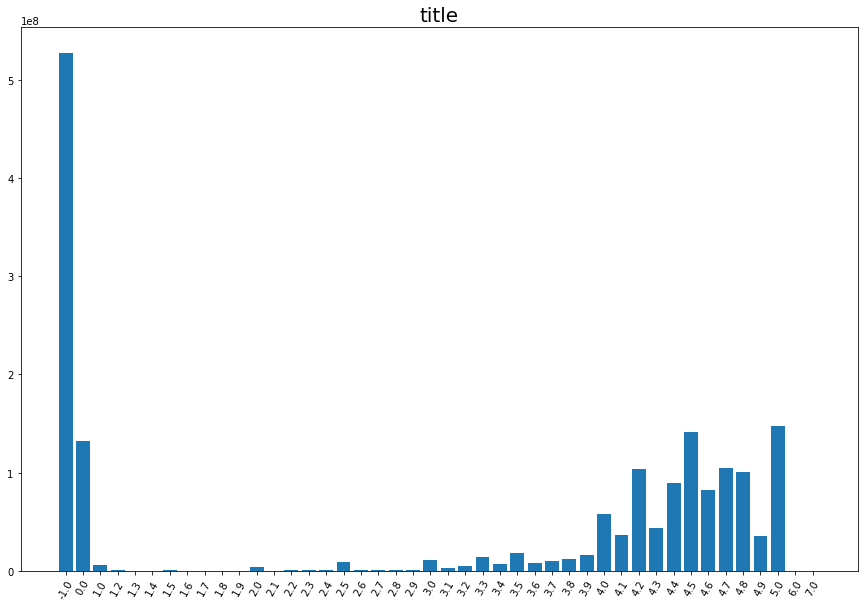

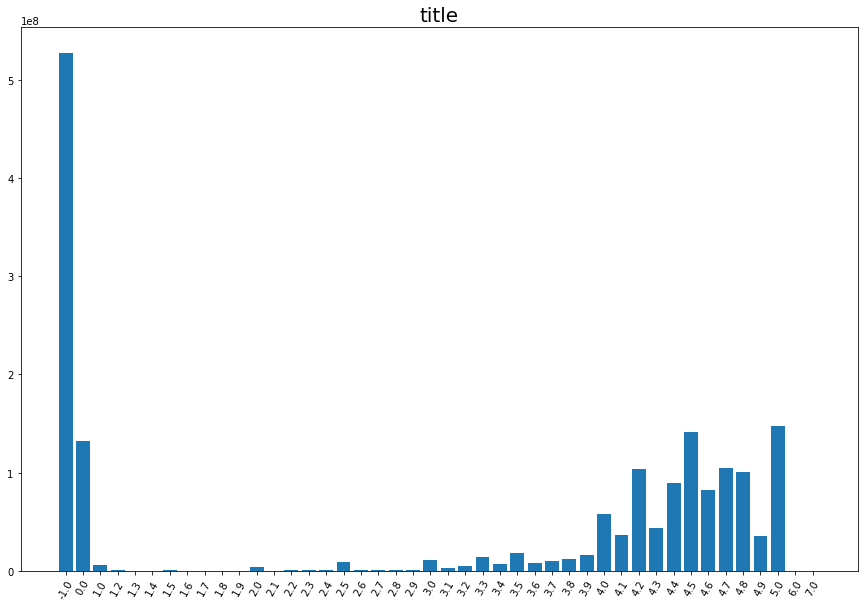

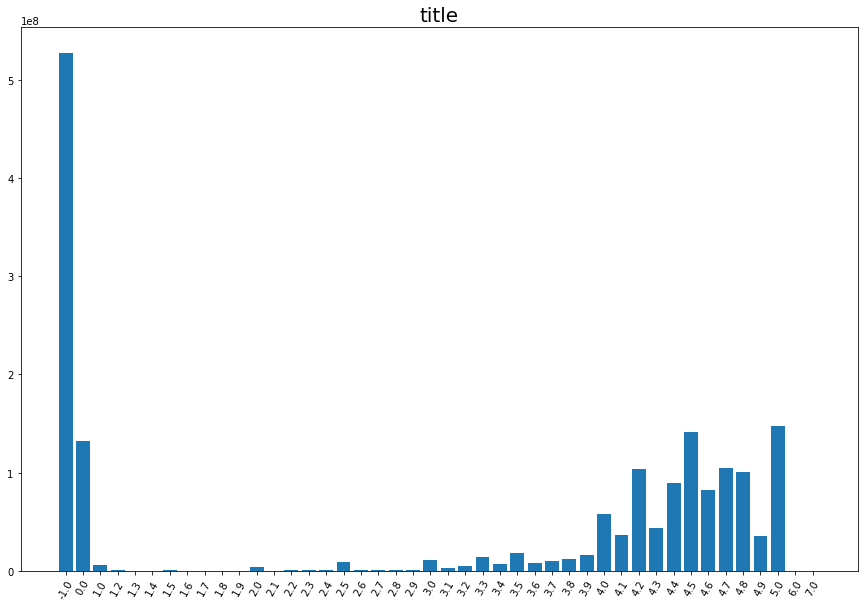

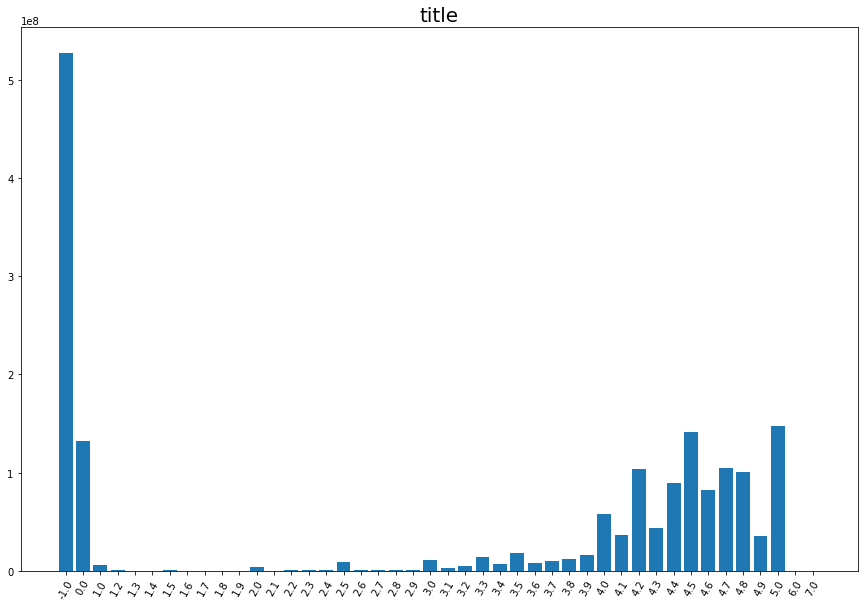

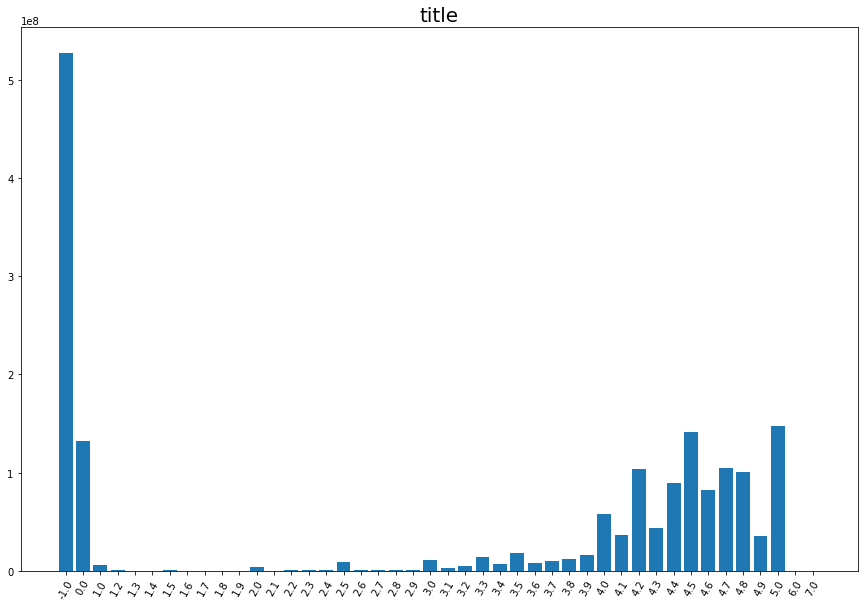

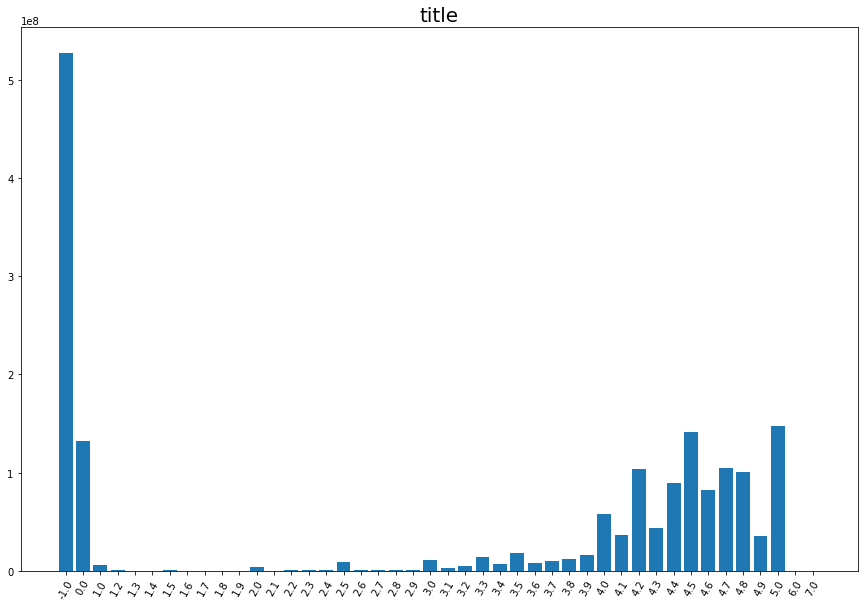

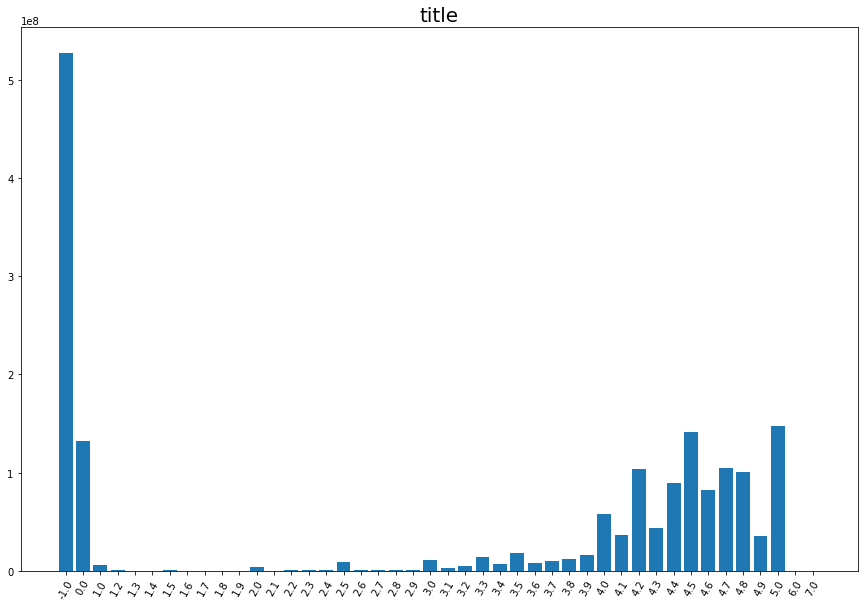

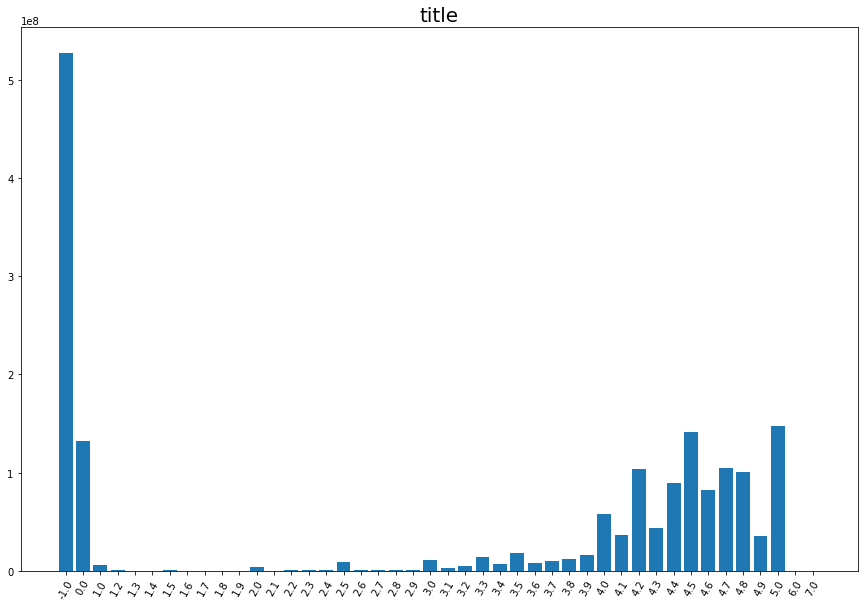

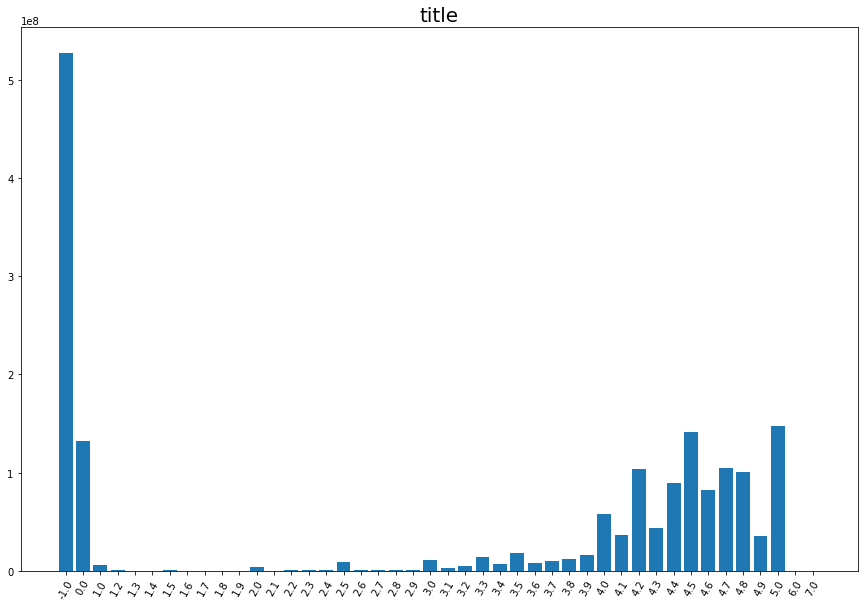

In [155]:
for day in df_clicks["Day"].unique():
    df = df_clicks[df_clicks["Day"]==day]
    all_values = df[dimension].unique()
    cardinality = len(all_values)
    max_value = max(all_values)
    min_value = min(all_values)
    
    print("day = " + day  + " cardinality = "+ str(cardinality) + " min value = "+ str(min_value) +" max value = "+ str(max_value) )

    df["cbs_product_rating_rounded"] = round_column(df, "cbs_product_rating", 10)
    df_rounded = df.groupby("cbs_product_rating_rounded", as_index = False).sum()
    plot_bar(df_clicks_rounded["cbs_product_rating_rounded"], df_clicks_rounded["Count"], "title")
#print("min value = "+ str(min_value))
#print("max value = "+ str(max_value))

In [170]:
import numpy as np
def plot_multiple_bar(x_values, y_values, title):
    plt.figure(figsize=(15, 10))
    plt.title(title, size=20)
    
    for y in y_values:
        plt.bar(x, y)
    plt.xticks(rotation=60)

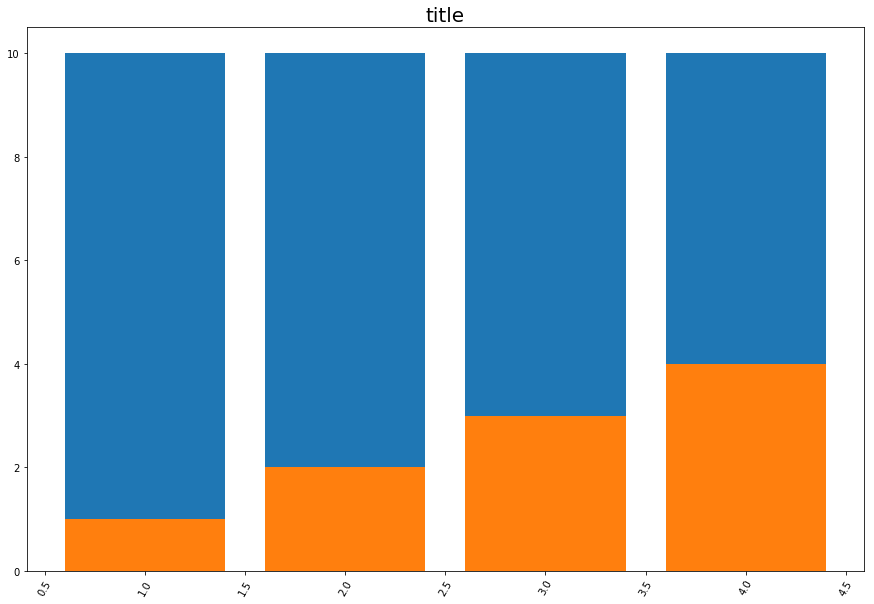

In [171]:
x=[1, 2, 3, 4]
y1 = [1, 2, 3, 4]
y2 = [10,10, 10, 10]
#plot_multiple_bar(x, [y2, y1], "title")

plot_multiple_bar(df_clicks_rounded["cbs_product_rating_rounded"], [df_clicks_rounded["Ratio"], df_clicks_rounded["Ratio"]], "title")

In [ ]:
plt.figure(figsize=(15, 10))

volume_label = "Count"
[top_ids_count, df_crop] = get_top_values_for_aggregator(df_clicks, dimension, volume_label, cropping_threshold = 1, subplot=221)
plot_pie_df_subplot(df_crop, "Percentage " + volume_label, dimension,  dimension + " per " + volume_label, 221)

volume_label = "clicks"
[top_ids_count, df_crop] = get_top_values_for_aggregator(df_clicks, dimension, volume_label, cropping_threshold = 1, subplot=221)
plot_pie_df_subplot(df_crop, "Percentage " + volume_label, dimension,  dimension + " per " + volume_label, 222)

volume_label = "Ratio"
[top_ids_count, df_crop] = get_top_values_for_aggregator(df_clicks, dimension, volume_label, cropping_nb_rows = 10, subplot=221)
plot_pie_df_subplot(df_crop, "Percentage " + volume_label, dimension,  dimension + " per " + volume_label, 223)

In [16]:
display_rows_by_aggretor(df_clicks, aggregator, label_table, top_ids[:-1])

+---------------------+------------+-----------+------------------+
|                     |    Mean    |    Std    | Std/Mean percent |
+=====================+============+===========+==================+
| 131: Count per day  | 28,003,891 | 2,105,620 | 7.5%             |
+---------------------+------------+-----------+------------------+
| 131: Count per hour | 1,167,506  | 459,743   | 39.4%            |
+---------------------+------------+-----------+------------------+
| 164: Count per day  | 15,506,932 | 2,704,086 | 17.4%            |
+---------------------+------------+-----------+------------------+
| 164: Count per hour | 646,306    | 308,145   | 47.7%            |
+---------------------+------------+-----------+------------------+
| 193: Count per day  | 11,045,616 | 1,516,982 | 13.7%            |
+---------------------+------------+-----------+------------------+
| 193: Count per hour | 460,446    | 182,242   | 39.6%            |
+---------------------+------------+-----------+

### Analyse one retailer 

In [17]:
id = 131
df_aggregator = df_clicks[df_clicks[aggregator] == id]
[df_aggregator_by_day, df_aggregator_by_hour] = split(df_aggregator, label_table)

In [18]:
rows = [["", "Mean", 'Std', "Std/Mean percent"]]
update_rows(rows, [(df_aggregator_by_day, "day"), (df_aggregator_by_hour, "hour")], 
            [volume_label], str(id))
display(rows)

+---------------------+------------+-----------+------------------+
|                     |    Mean    |    Std    | Std/Mean percent |
+=====================+============+===========+==================+
| 131: Count per day  | 28,003,891 | 2,105,620 | 7.5%             |
+---------------------+------------+-----------+------------------+
| 131: Count per hour | 1,167,506  | 459,743   | 39.4%            |
+---------------------+------------+-----------+------------------+


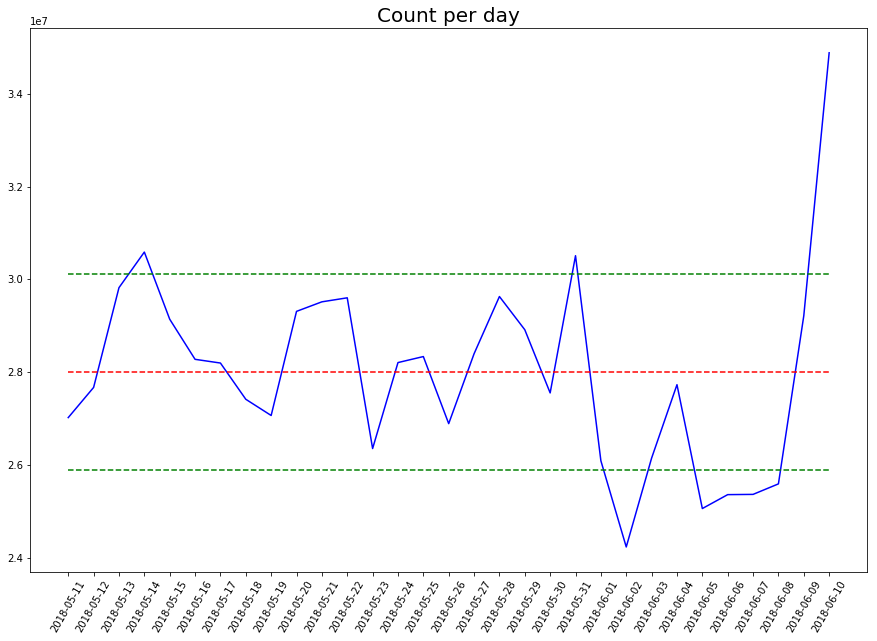

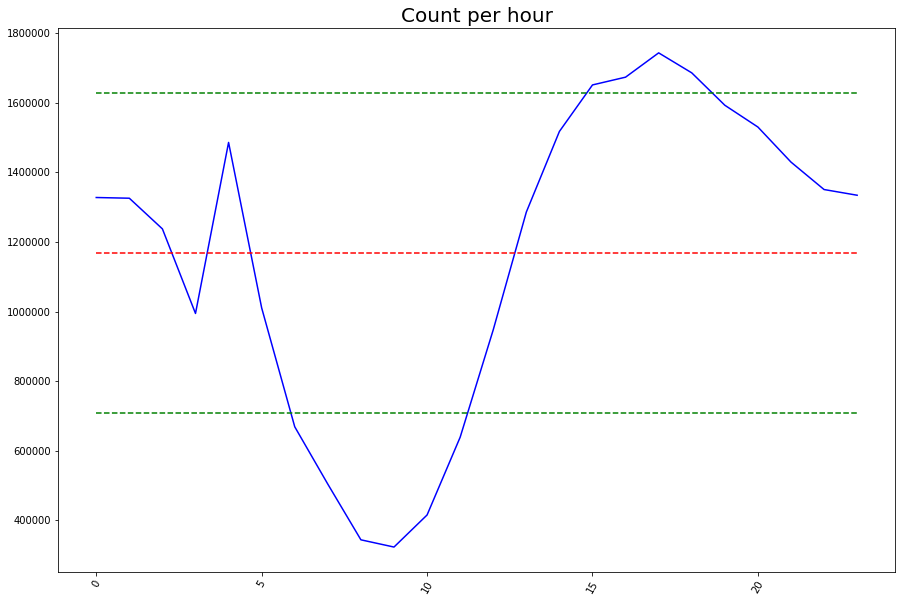

In [19]:
plot_df(df_aggregator_by_day,"Day", volume_label, volume_label+ " per day", True)
plot_df(df_aggregator_by_hour,"Hour", volume_label, volume_label+ " per hour", True)